In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
df = pd.read_csv("/kaggle/input/olympics-2024/athletes new.csv")

In [3]:
df.columns

Index(['code', 'name', 'name_short', 'name_tv', 'gender', 'function',
       'country_code', 'country', 'country_full', 'nationality',
       'nationality_full', 'nationality_code', 'height', 'weight',
       'disciplines', 'events', 'birth_date'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11115 entries, 0 to 11114
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   code              11115 non-null  int64  
 1   name              11115 non-null  object 
 2   name_short        11115 non-null  object 
 3   name_tv           11115 non-null  object 
 4   gender            11115 non-null  object 
 5   function          11115 non-null  object 
 6   country_code      11115 non-null  object 
 7   country           11115 non-null  object 
 8   country_full      11115 non-null  object 
 9   nationality       11115 non-null  object 
 10  nationality_full  11115 non-null  object 
 11  nationality_code  11115 non-null  object 
 12  height            11115 non-null  int64  
 13  weight            11099 non-null  float64
 14  disciplines       11115 non-null  object 
 15  events            11115 non-null  object 
 16  birth_date        11115 non-null  object

# What is the average height and weight of athletes in the dataset?

In [5]:
# Calculate the average height and weight
average_height = df['height'].mean()
average_weight = df['weight'].mean()

print(f"Average Height of Athletes: {average_height}")
print(f"Average Weight of Athletes: {average_weight}")

Average Height of Athletes: 81.83517768780926
Average Weight of Athletes: 2.2137129471123527


# What is the distribution of athletes by gender?

In [6]:
df['gender'].value_counts().reset_index(name='Count')

,gender,Count
0,Male,5655
1,Female,5460


# Which country has the highest number of athletes in the dataset?

In [7]:
# Group by country and count the number of athletes in each country
country_counts = df['country'].value_counts()

# Find the country with the highest number of athletes
most_common_country = country_counts.idxmax()
most_common_country_count = country_counts.max()

print(f"Country with the highest number of athletes: {most_common_country}")
print(f"Number of athletes from {most_common_country}: {most_common_country_count}")

Country with the highest number of athletes: United States
Number of athletes from United States: 620


# What is the average height and weight of athletes for each country?

In [8]:
# Group by country and calculate the average height and weight
average_stats_by_country = df.groupby('country')[['height', 'weight']].mean()

print(average_stats_by_country)

                        height  weight
country                               
AIN                  39.718750     0.0
Afghanistan          57.000000     0.0
Albania              44.250000     0.0
Algeria              59.195652     0.0
American Samoa       76.000000     0.0
...                        ...     ...
Virgin Islands, B   129.250000     0.0
Virgin Islands, US   36.000000     0.0
Yemen                45.750000     0.0
Zambia              147.322581     0.0
Zimbabwe             49.428571     0.0

[206 rows x 2 columns]


# Which country has the most diverse set of disciplines?

In [9]:
# Group by country and aggregate the set of unique disciplines
disciplines_by_country = df.groupby('country')['disciplines'].unique()

# Count the number of unique disciplines for each country
num_disciplines_by_country = disciplines_by_country.apply(len)

# Find the country with the most diverse set of disciplines
most_diverse_country = num_disciplines_by_country.idxmax()
most_diverse_country_count = num_disciplines_by_country.max()

print(f"Country with the most diverse set of disciplines: {most_diverse_country}")
print(f"Number of unique disciplines in {most_diverse_country}: {most_diverse_country_count}")

Country with the most diverse set of disciplines: United States
Number of unique disciplines in United States: 47


# How many unique disciplines are represented in the dataset?

In [10]:
# Calculate the number of unique disciplines
num_unique_disciplines = df['disciplines'].nunique()

print(f"Number of unique disciplines represented in the dataset: {num_unique_disciplines}")

Number of unique disciplines represented in the dataset: 50


# What are the top 5 disciplines with the highest number of athletes?

In [11]:
# Group by discipline and count the number of athletes in each discipline
discipline_counts = df['disciplines'].value_counts().reset_index(name='Count')

# Get the top 5 disciplines with the highest number of athletes
top_5_disciplines = discipline_counts.head(5)

print(f"Top 5 disciplines with the highest number of athletes: \n{top_5_disciplines}")
# print(top_5_disciplines)

Top 5 disciplines with the highest number of athletes: 
     disciplines  Count
0  ['Athletics']   2023
1   ['Swimming']    836
2   ['Football']    553
3     ['Rowing']    493
4     ['Hockey']    415


# For each discipline, what is the average height and weight of athletes?

In [12]:
# Group by discipline and calculate the average height and weight
average_stats_by_discipline = df.groupby('disciplines')[['height', 'weight']].mean()

print(average_stats_by_discipline)

                                               height     weight
disciplines                                                     
['3x3 Basketball', 'Basketball']           183.000000   0.000000
['3x3 Basketball']                         190.046875   0.000000
['Archery']                                  0.000000   0.000000
['Artistic Gymnastics']                      0.000000   0.000000
['Artistic Swimming']                        0.000000   0.000000
['Athletics']                              173.481957   0.000000
['Badminton']                              173.902857   0.000000
['Basketball']                             191.547038   0.000000
['Beach Volleyball']                       188.312500   0.000000
['Boxing']                                 173.068548   0.000000
['Breaking']                                 0.000000   0.000000
['Canoe Slalom']                             0.000000   0.000000
['Canoe Sprint']                             0.000000   0.000000
['Cycling BMX Freestyle']

# Convert the `birth_date` column to datetime format and calculate the age of each athlete.

In [13]:
# Convert the 'birth_date' column to datetime format
df['birth_date'] = pd.to_datetime(df['birth_date'], errors='coerce')

# Calculate the age of each athlete
df['age'] = (pd.Timestamp.today() - df['birth_date']).dt.days // 365.25

# Display the dataset with the new 'age' column
print(df[['birth_date', 'age']].head())

  birth_date   age
0 1994-10-17  29.0
1 2006-07-28  18.0
2 2004-04-26  20.0
3 2000-01-14  24.0
4 1998-03-08  26.0


# What is the average age of athletes in the dataset?

In [14]:
# Calculate the average age of athletes
average_age = df['age'].mean()

print(f"The average age of athletes in the dataset is: {average_age:.2f} years")

The average age of athletes in the dataset is: 26.65 years


# How does the average age of athletes vary by gender?

In [15]:
# Group by gender and calculate the average age
average_age_by_gender = df.groupby('gender')['age'].mean().reset_index(name='Average Age')

print(f"Average age of athletes by gender: \n {average_age_by_gender}")
# print(average_age_by_gender)

Average age of athletes by gender: 
    gender  Average Age
0  Female    26.267033
1    Male    27.011141


# How many entries have missing values in the `weight` column?

In [16]:
# Count the number of missing values in the 'weight' column
missing_weight_count = df['weight'].isna().sum()

print(f"Number of entries with missing values in the 'weight' column: {missing_weight_count}")

Number of entries with missing values in the 'weight' column: 16


# What percentage of the dataset has missing values for the `weight` column?

In [17]:
# Count the number of missing values in the 'weight' column
missing_weight_count = df['weight'].isna().sum()

# Calculate the total number of entries in the dataset
total_entries = len(df)

# Calculate the percentage of missing values in the 'weight' column
missing_weight_percentage = (missing_weight_count / total_entries) * 100

print(f"Percentage of the dataset with missing values in the 'weight' column: {missing_weight_percentage:.2f}%")

Percentage of the dataset with missing values in the 'weight' column: 0.14%


# Create a scatter plot to visualize the relationship between height and weight of athletes.

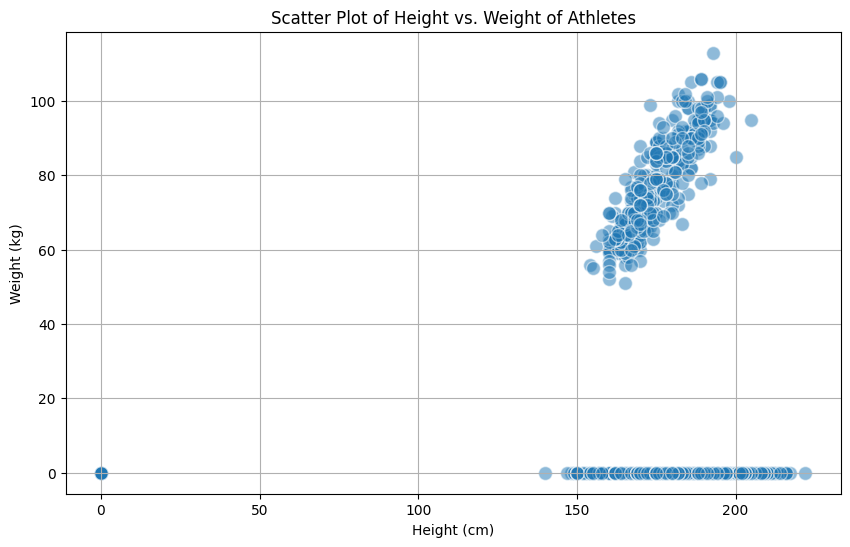

In [18]:
# Create a scatter plot of 'height' vs 'weight'
plt.figure(figsize=(10, 6))
plt.scatter(df['height'], df['weight'], alpha=0.5, edgecolors='w', s=100)
plt.title('Scatter Plot of Height vs. Weight of Athletes')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.grid(True)
plt.show()

# Generate a bar chart showing the number of athletes from each country.

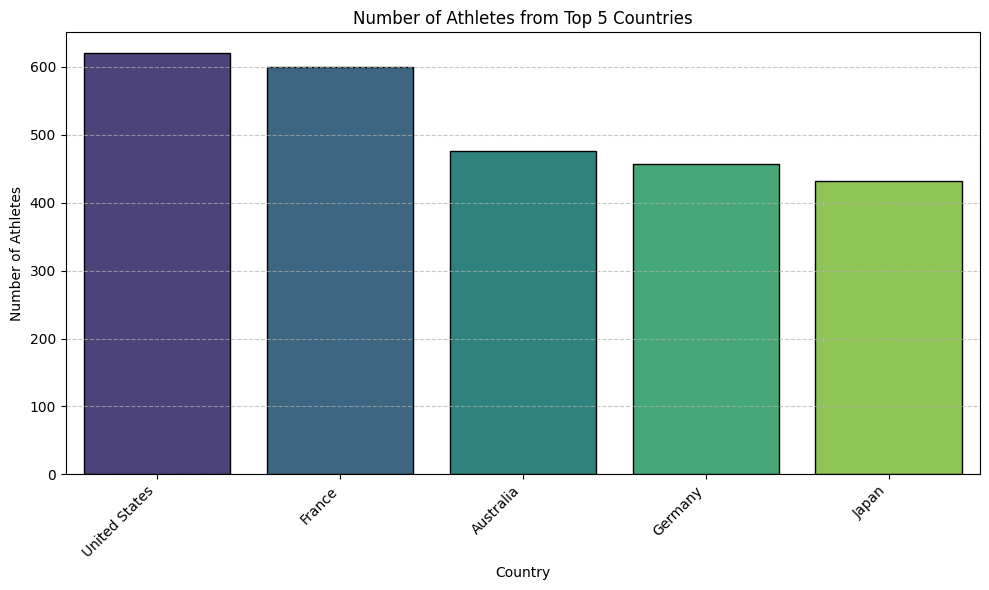

In [19]:
# Count the number of athletes from each country
country_counts = df['country'].value_counts()

# Select the top 5 countries
top_5_countries = country_counts.head(5)

# Create a DataFrame for Seaborn
top_5_df = top_5_countries.reset_index()
top_5_df.columns = ['country', 'number_of_athletes']

# Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_df, x='country', y='number_of_athletes', palette='viridis', edgecolor='black')
plt.title('Number of Athletes from Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# Plot a pie chart to represent the proportion of athletes by gender.

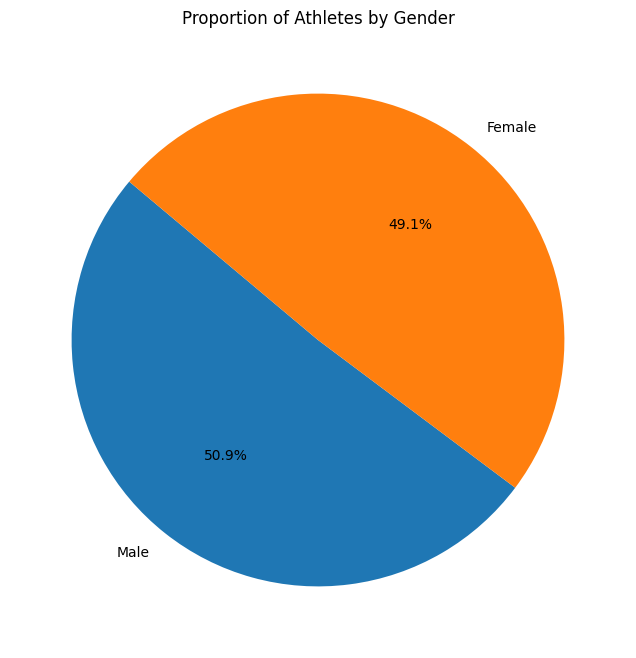

In [20]:
# Calculate the proportion of athletes by gender
gender_counts = df['gender'].value_counts()
gender_proportions = gender_counts / gender_counts.sum() * 100

# Create the pie chart
plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(gender_proportions, labels=gender_proportions.index, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Proportion of Athletes by Gender')

# Show the plot
plt.show()

# Plot a pie chart to represent the proportion of athletes by top 5 country.

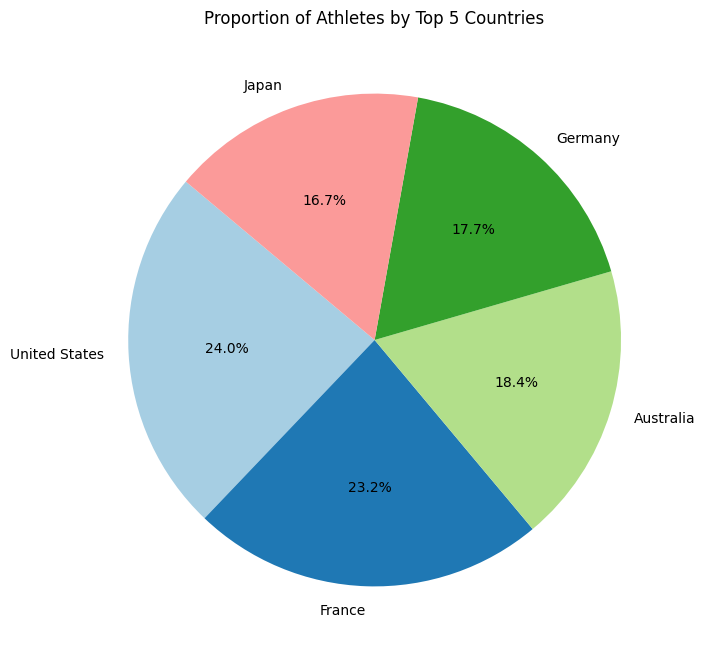

In [21]:
# Count the number of athletes by country
country_counts = df['country'].value_counts()

# Get the top 5 countries
top_5_countries = country_counts.head(5)

# Plot the pie chart
plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(top_5_countries, labels=top_5_countries.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(5)))

# Add a title
plt.title('Proportion of Athletes by Top 5 Countries')

# Show the plot
plt.show()